In [10]:
from Functions.fn_basic import *
from Functions.fn_stats import *
from Functions.fn_plots import *

import os, mne
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# exp_folder_1 = r"Eyes Closed\Baseline"
# exp_folder_2 = r"Eyes Closed\6 weeks"
# exp_folder_3 = r"Eyes Closed\10 weeks"

exp_folder_1 = r"Eyes Open\Baseline"
exp_folder_2 = r"Eyes Open\6 weeks"
exp_folder_3 = r"Eyes Open\10 weeks"

psd_reg_folder = r"Results\PSD\regions"
psd_ch_folder = r"Results\PSD\channels"

#condition_code_list = [['EC_00','EC_06'],['EC_06','EC_07'],['EC_00','EC_07']]
condition_code_list = [['EO_00','EO_06'],['EO_06','EO_07'],['EO_00','EO_07']]

[dir_inprogress_reg_1,b_names_reg_1,condition_reg_1] = read_excel_psd(exp_folder_1,psd_reg_folder)
[dir_inprogress_reg_2,b_names_reg_2,condition_reg_2] = read_excel_psd(exp_folder_2,psd_reg_folder)
[dir_inprogress_reg_3,b_names_reg_3,condition_reg_3] = read_excel_psd(exp_folder_3,psd_reg_folder)

dir_inprogress_reg = dir_inprogress_reg_1,dir_inprogress_reg_2,dir_inprogress_reg_3
b_names_reg = b_names_reg_1,b_names_reg_2,b_names_reg_3
condition_reg = condition_reg_1,condition_reg_2,condition_reg_3

[dir_inprogress_ch_1,b_names_ch_1,condition_ch_1] = read_excel_psd(exp_folder_1,psd_ch_folder)
[dir_inprogress_ch_2,b_names_ch_2,condition_ch_2] = read_excel_psd(exp_folder_2,psd_ch_folder)
[dir_inprogress_ch_3,b_names_ch_3,condition_ch_3] = read_excel_psd(exp_folder_3,psd_ch_folder)

dir_inprogress_ch = dir_inprogress_ch_1,dir_inprogress_ch_2,dir_inprogress_ch_3
b_names_ch = b_names_ch_1,b_names_ch_2,b_names_ch_3
condition_ch = condition_ch_1,condition_ch_2,condition_ch_3

clean_folder = r"Data\Clean"
dir_inprogress_epo = os.path.join(clean_folder,exp_folder_1)
_, subject_names = read_files(dir_inprogress_epo,"_clean-epo.fif")
epochs = mne.read_epochs(fname='{}\{}_clean-epo.fif'.format(dir_inprogress_epo,subject_names[0]),verbose=False)

Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 5
Files in folder: 26


In [36]:
df_psd_reg = pd.DataFrame()
for i in range(len(b_names_reg[0])):
    for n_exps in range(len(b_names_reg)):
        globals()[b_names_reg[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_reg[n_exps],b_names_reg[n_exps][i]))\
            .assign(**{'Frequency band': condition_reg[n_exps][i][1],'Condition': condition_reg[n_exps][i][0]})
        df_psd_reg = pd.concat([df_psd_reg,globals()[b_names_reg[n_exps][i]]])

for condition in condition_code_list:
    df_reg_pvals,significant_reg = apply_stat_test(df_psd_reg,condition,stat_test='Wilcoxon')
    try:
        os.makedirs(os.path.join(psd_reg_folder,''))
    except FileExistsError:
        pass
    df_reg_pvals.to_excel(r"Results\PSD\regions\p-values_{}-{}.xlsx".format(condition[0],condition[1]))

['EO_06', 'EO_07'] Significant changes of Alpha are at ['Occipital']
['EO_06', 'EO_07'] Significant changes of High-Beta are at ['Temporal' 'Occipital']
['EO_06', 'EO_07'] Significant changes of Low-Beta are at ['Occipital']


In [37]:
df_psd_ch = pd.DataFrame()
for i in range(len(b_names_ch[0])):
    for n_exps in range(len(b_names_ch)):
        globals()[b_names_ch[n_exps][i]] = pd.read_excel('{}\{}.xlsx'\
                                            .format(dir_inprogress_ch[n_exps],b_names_ch[n_exps][i]))\
            .assign(**{'Frequency band': condition_ch[n_exps][i][1],'Condition': condition_ch[n_exps][i][0]})
        df_psd_ch = pd.concat([df_psd_ch,globals()[b_names_ch[n_exps][i]]])

for condition in condition_code_list:
    df_ch_pvals,significant_ch = apply_stat_test(df_psd_ch,condition,stat_test='Wilcoxon')
    try:
        os.makedirs(os.path.join(psd_ch_folder,''))
    except FileExistsError:
        pass
    df_ch_pvals.to_excel(r"Results\PSD\channels\p-values_{}-{}.xlsx".format(condition[0],condition[1]))

['EO_00', 'EO_06'] Significant changes of Low-Beta are at ['Fz']
['EO_06', 'EO_07'] Significant changes of Alpha are at ['PO3' 'P8']
['EO_06', 'EO_07'] Significant changes of Delta are at ['Cz']
['EO_06', 'EO_07'] Significant changes of High-Beta are at ['F7' 'PO3' 'P4' 'P8' 'CP6' 'C4' 'FC6']
['EO_06', 'EO_07'] Significant changes of Low-Beta are at ['PO3' 'O1' 'Oz' 'PO4' 'P8' 'C4']
['EO_00', 'EO_07'] Significant changes of Alpha are at ['Fp1' 'CP5' 'PO3']


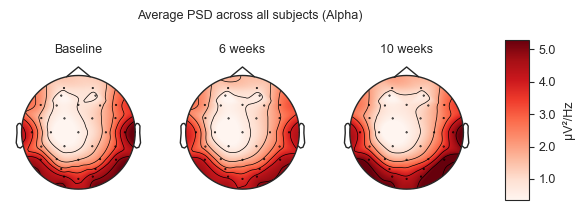

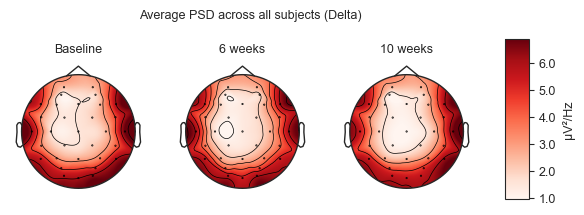

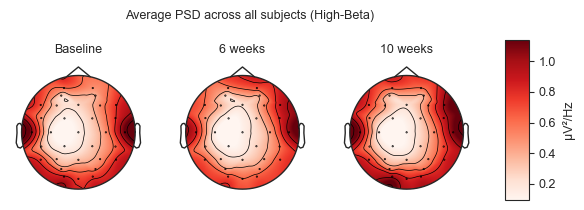

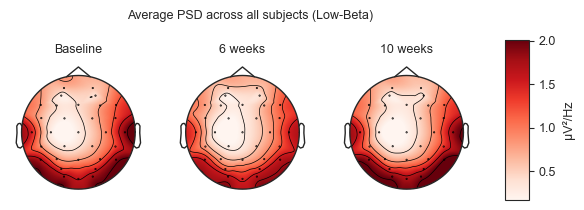

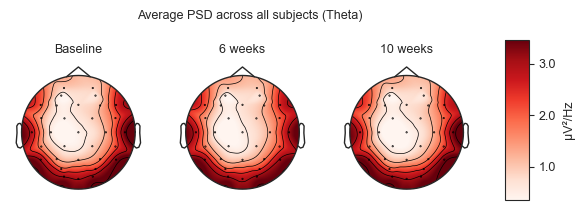

In [38]:
for b_name in (df_psd_ch['Frequency band'].unique()):
    plot_topomaps_band(df_psd_ch,epochs,b_name,condition_legend=['Baseline','6 weeks','10 weeks'],
                       conditions=['EO_00','EO_06','EO_07'],fnt=['sans-serif',9],title=True,export=True)

['EO_06', 'EO_07'] Significant changes of Alpha are at ['Occipital']
['EO_06', 'EO_07'] Significant changes of High-Beta are at ['Occipital']
['EO_06', 'EO_07'] Significant changes of Low-Beta are at ['Occipital']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Low-Beta_EO_06 vs. Low-Beta_EO_07: Wilcoxon test (paired samples), P_val:7.952e-03 Stat=7.100e+01
Alpha_EO_06 vs. Alpha_EO_07: Wilcoxon test (paired samples), P_val:2.459e-02 Stat=8.700e+01
['EO_06', 'EO_07'] Significant changes of High-Beta are at ['Temporal' 'Occipital']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Occipital_EO_06 vs. Occipital_EO_07: Wilcoxon test (paired samples), P_val:3.186e-02 Stat=9.100e+01
Temporal_EO_06 vs. Temporal_EO_07: Wilcoxon test (

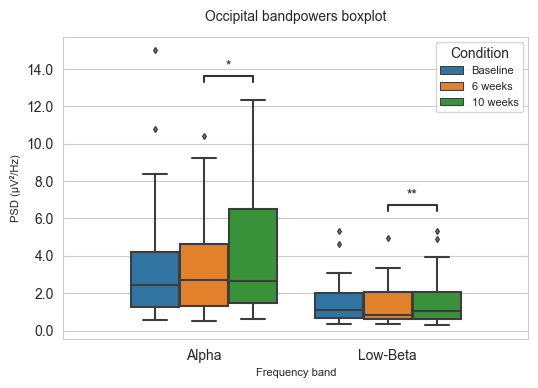

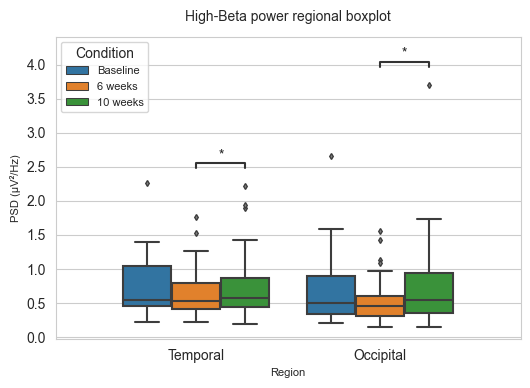

In [42]:
plot_boxplot_location(df_psd_reg,bands=['Alpha','Low-Beta'],region='Occipital',
                      condition_comp_list=condition_code_list,
                      condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                      title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

plot_boxplot_band(df_psd_reg,regions=['Temporal','Occipital'],band='High-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

['EO_00', 'EO_06'] Significant changes of Low-Beta are at ['Fz']
['EO_06', 'EO_07'] Significant changes of Low-Beta are at ['PO3' 'O1' 'Oz' 'PO4' 'P8' 'C4']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

PO4_EO_06 vs. PO4_EO_07: Wilcoxon test (paired samples), P_val:2.459e-02 Stat=8.700e+01
PO3_EO_06 vs. PO3_EO_07: Wilcoxon test (paired samples), P_val:6.328e-03 Stat=6.800e+01
['EO_06', 'EO_07'] Significant changes of High-Beta are at ['F7' 'PO3' 'P4' 'P8' 'CP6' 'C4' 'FC6']
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

P4_EO_06 vs. P4_EO_07: Wilcoxon test (paired samples), P_val:4.618e-02 Stat=9.700e+01
FC6_EO_06 vs. FC6_EO_07: Wilcoxon test (paired samples), P_val:3.614e-02 Stat=9.300e+01
PO3_EO_06 vs. PO3_EO_07: Wilcoxo

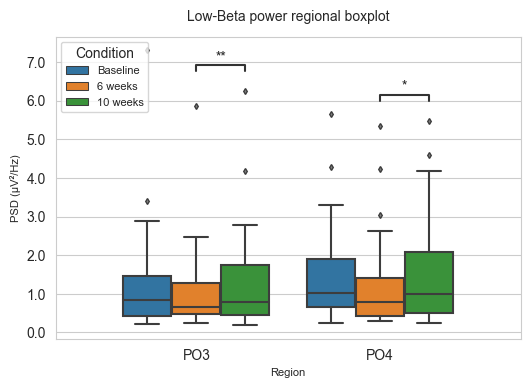

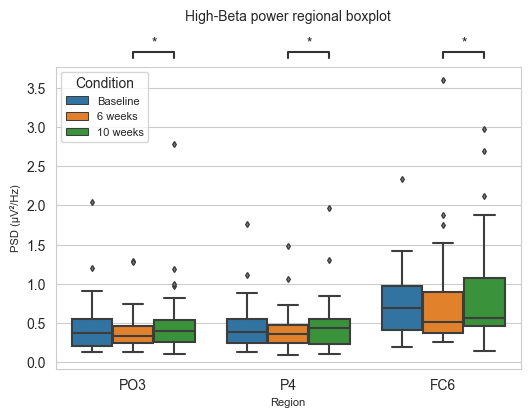

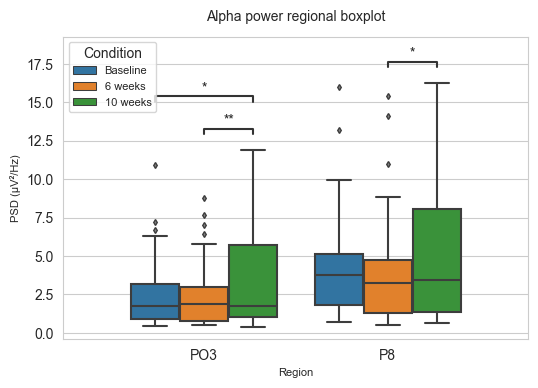

In [39]:
plot_boxplot_band(df_psd_ch,regions=['PO3','PO4'],band='Low-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

plot_boxplot_band(df_psd_ch,regions=['PO3','P4','FC6'],band='High-Beta',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='outside',export=True)

plot_boxplot_band(df_psd_ch,regions=['PO3','P8'],band='Alpha',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=True,stat_test='Wilcoxon',ast_loc='inside',export=True)

['EO_06', 'EO_07'] Significant changes of Alpha are at ['PO3' 'P8']
['EO_00', 'EO_07'] Significant changes of Alpha are at ['Fp1' 'CP5' 'PO3']


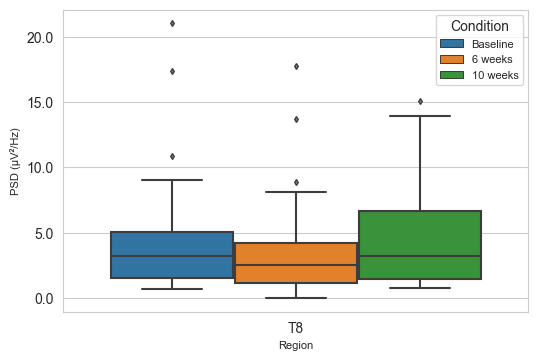

In [8]:
plot_boxplot_band(df_psd_ch,regions=['T8'],band='Alpha',
                  condition_comp_list=condition_code_list,
                  condition_legend=['Baseline','6 weeks','10 weeks'],fnt=['sans-serif',8,10],
                  title=False,stat_test='Wilcoxon',ast_loc='inside',export=True)

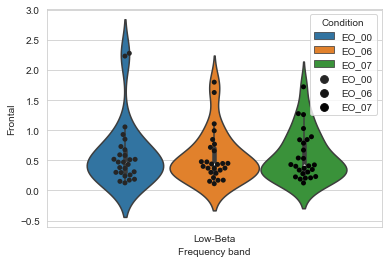

In [9]:
# plt.figure()
# ax = sns.violinplot(x='Frequency band', y='Frontal',
#                  hue='Condition',
#                  data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])
# ax = sns.swarmplot(x='Frequency band', y='Frontal',
#                    hue='Condition', color='0.01', dodge=True,
#                    data=df_psd_reg[df_psd_reg['Frequency band'] == 'Low-Beta'])